In [7]:
import pandas as pd
import os

# 파일 경로 설정
DATA_DIR = r"D:\Project\PJT_10\shopee-product-matching"
CSV_PATH = os.path.join(DATA_DIR, "train.csv")

# 데이터 로드
df = pd.read_csv(CSV_PATH)

# label_group별 개수 세기
label_counts = df["label_group"].value_counts().sort_values(ascending=False)

# 출력
print("📊 Label Group별 데이터 수:")
print(label_counts)

📊 Label Group별 데이터 수:
label_group
562358068     51
994676122     51
159351600     51
1163569239    51
1141798720    51
              ..
2763277377     2
935788435      2
2636279112     2
1157486139     2
1487412379     2
Name: count, Length: 11014, dtype: int64


In [13]:
label_counts.tail()

label_group
2763277377    2
935788435     2
2636279112    2
1157486139    2
1487412379    2
Name: count, dtype: int64

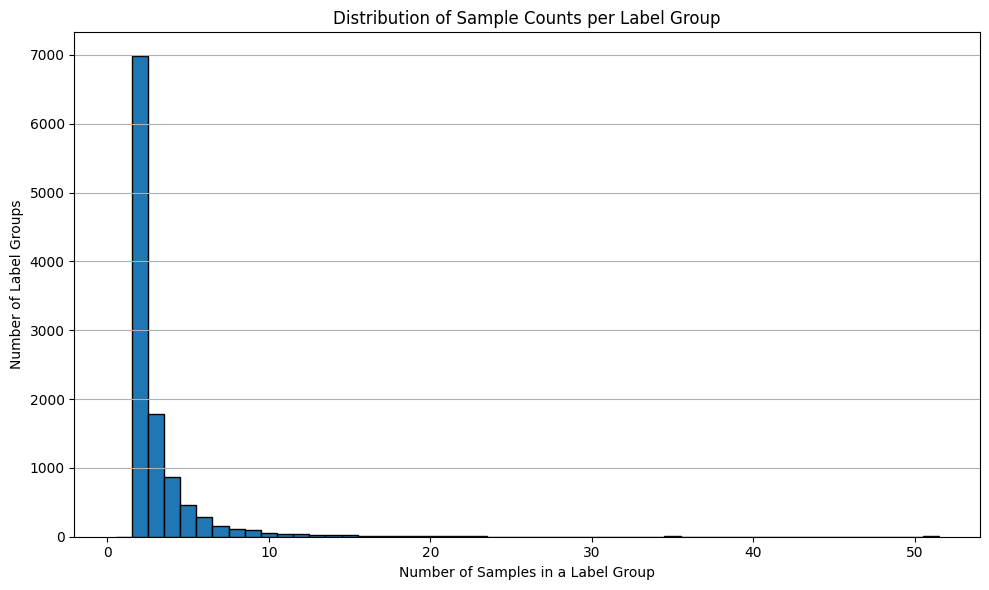

In [3]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(label_counts, bins=range(1, label_counts.max() + 2), edgecolor='black', align='left')
plt.title("Distribution of Sample Counts per Label Group")
plt.xlabel("Number of Samples in a Label Group")
plt.ylabel("Number of Label Groups")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_30420\826907377.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


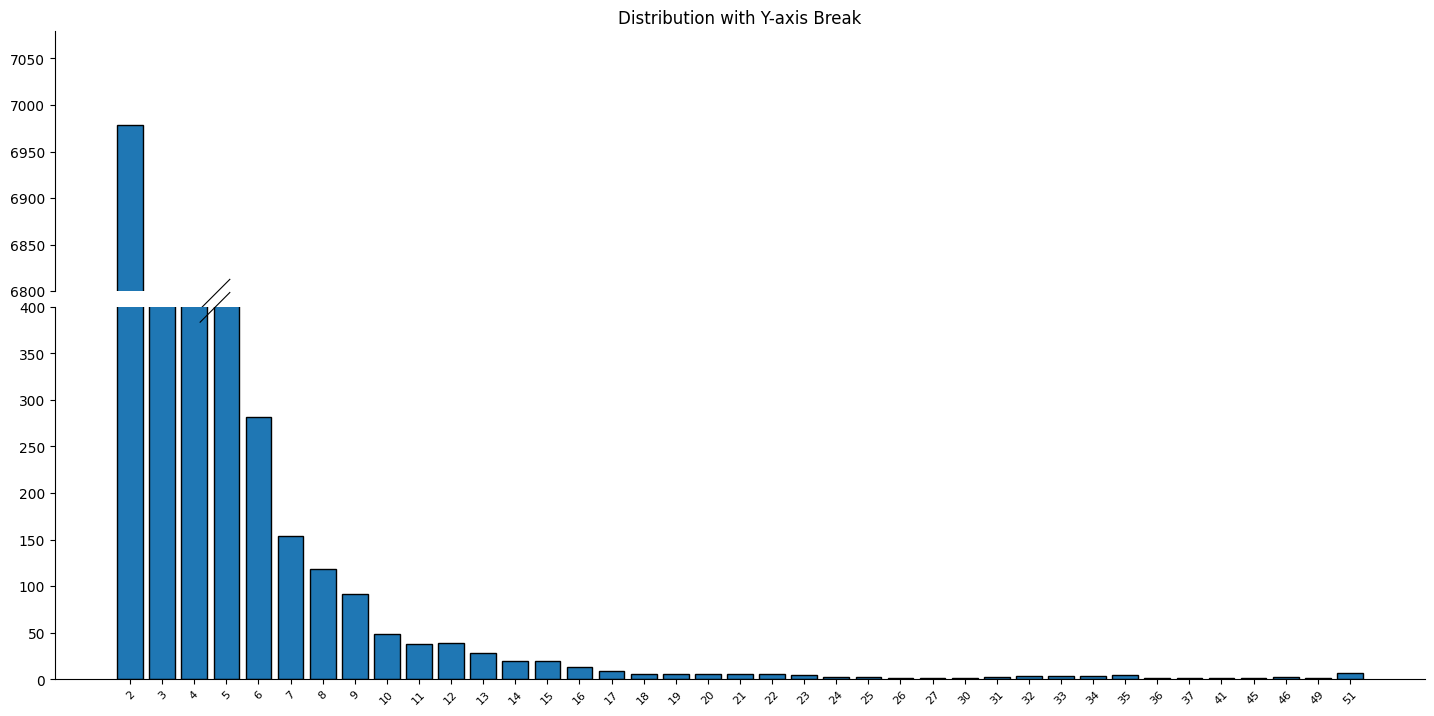

In [42]:
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np

counts = label_counts.value_counts().sort_index()
x = np.arange(len(counts))
y = counts.values
x_labels = counts.index.to_list()

fig = plt.figure(figsize=(14, 7))
bax = brokenaxes(ylims=((0, 400), (6800, y.max() + 100)), hspace=0.05)

bax.bar(x, y, edgecolor='black', align='center')

# brokenaxes가 내부적으로 두 개 축을 생성하므로 각각에 눈금 설정 필요
for ax in bax.axs:
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=45, fontsize=8)

#bax.set_xlabel("Samples per Label Group")
#bax.set_ylabel("Number of Label Groups")
bax.set_title("Distribution with Y-axis Break")

plt.tight_layout()
plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_30420\2211243070.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


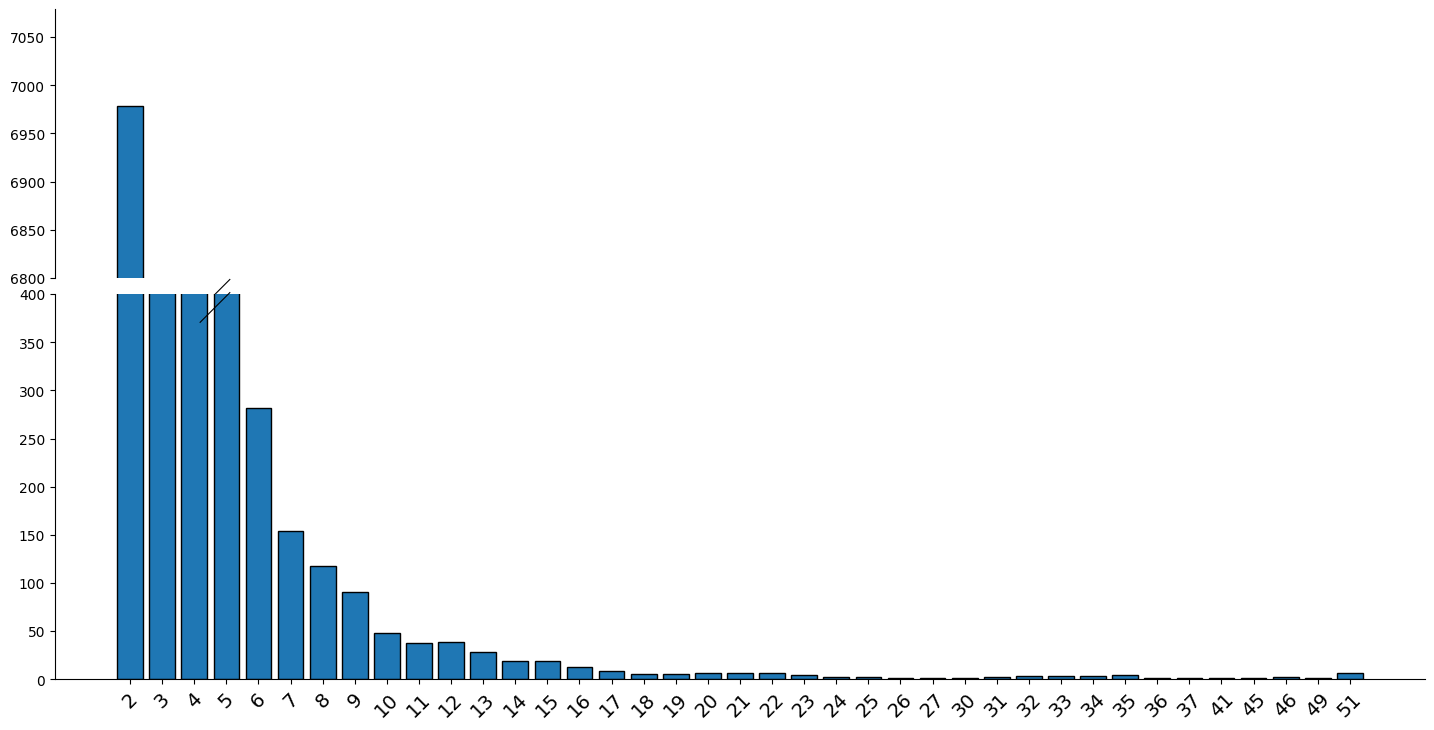

In [45]:
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np

counts = label_counts.value_counts().sort_index()
x = np.arange(len(counts))
y = counts.values
x_labels = counts.index.to_list()

fig = plt.figure(figsize=(14, 7))
bax = brokenaxes(ylims=((0, 400), (6800, y.max() + 100)), hspace=0.05)

bax.bar(x, y, edgecolor='black', align='center')

# x축 눈금 라벨 폰트 키우기
for ax in bax.axs:
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=45, fontsize=14)  # 폰트 크게

# 축 제목 및 그래프 제목 폰트 키우기
#bax.set_xlabel("Samples per Label Group", fontsize=16)
#bax.set_ylabel("Number of Label Groups", fontsize=16)
#bax.set_title("Distribution with Y-axis Break", fontsize=18)

plt.tight_layout()
plt.show()

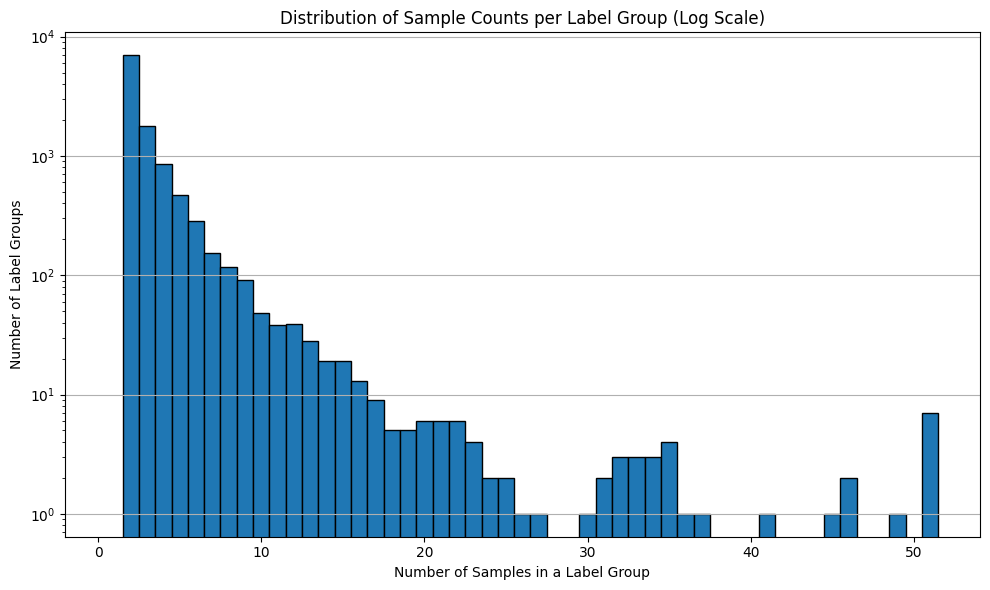

In [11]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(
    label_counts,
    bins=range(1, label_counts.max() + 2),
    edgecolor='black',
    align='left'
)
plt.title("Distribution of Sample Counts per Label Group (Log Scale)")
plt.xlabel("Number of Samples in a Label Group")
plt.ylabel("Number of Label Groups")
plt.yscale("log")  # 🔥 Y축 로그 스케일 적용
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [5]:
OUTPUT_PATH = os.path.join(DATA_DIR, "label_group_counts.csv")

# DataFrame으로 변환
label_counts_df = label_counts.reset_index()
label_counts_df.columns = ["label_group", "count"]

# CSV 저장 (utf-8 인코딩)
label_counts_df.to_csv(OUTPUT_PATH, index=False, encoding='utf-8')

print(f"✅ 저장 완료: {OUTPUT_PATH}")

✅ 저장 완료: D:\Project\PJT_10\shopee-product-matching\label_group_counts.csv


In [6]:
# 동일한 count를 가진 label_group이 몇 개인지 세기
count_of_counts = label_counts.value_counts().sort_index()

# 결과 출력
print("🎯 각 count 값에 해당하는 label_group 개수:")
print(count_of_counts)

🎯 각 count 값에 해당하는 label_group 개수:
count
2     6979
3     1779
4      862
5      468
6      282
7      154
8      118
9       91
10      48
11      38
12      39
13      28
14      19
15      19
16      13
17       9
18       5
19       5
20       6
21       6
22       6
23       4
24       2
25       2
26       1
27       1
30       1
31       2
32       3
33       3
34       3
35       4
36       1
37       1
41       1
45       1
46       2
49       1
51       7
Name: count, dtype: int64


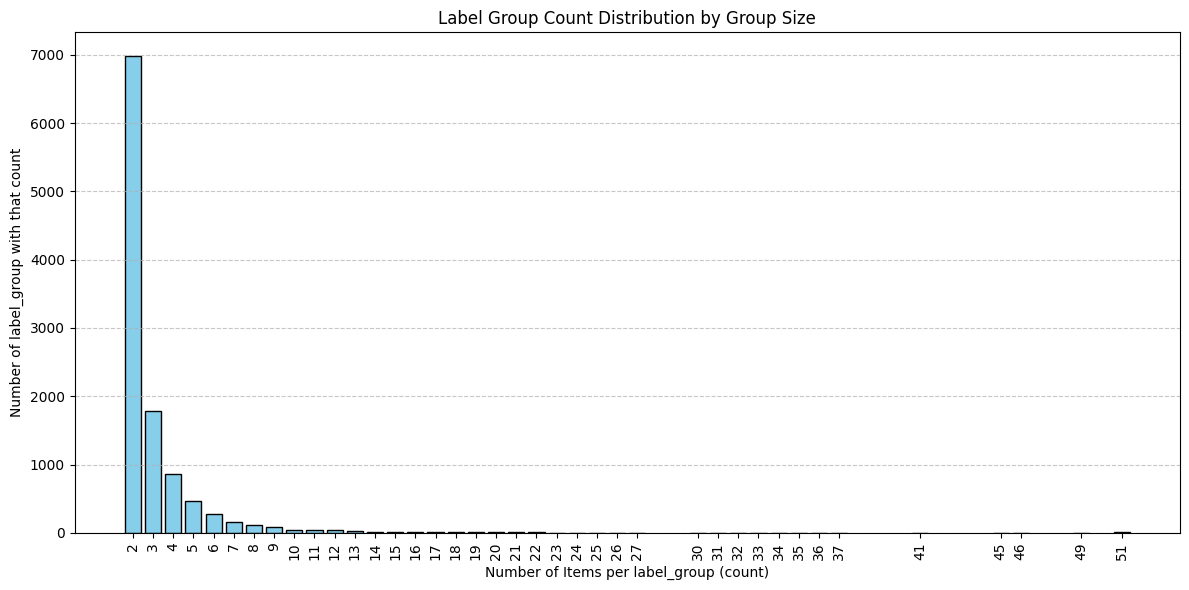

In [9]:
import matplotlib.pyplot as plt

# 동일한 count를 가진 label_group이 몇 개인지 세기
count_of_counts = label_counts.value_counts().sort_index()

# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.bar(count_of_counts.index, count_of_counts.values, color='skyblue', edgecolor='black')
plt.title("Label Group Count Distribution by Group Size")
plt.xlabel("Number of Items per label_group (count)")
plt.ylabel("Number of label_group with that count")
plt.xticks(count_of_counts.index, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

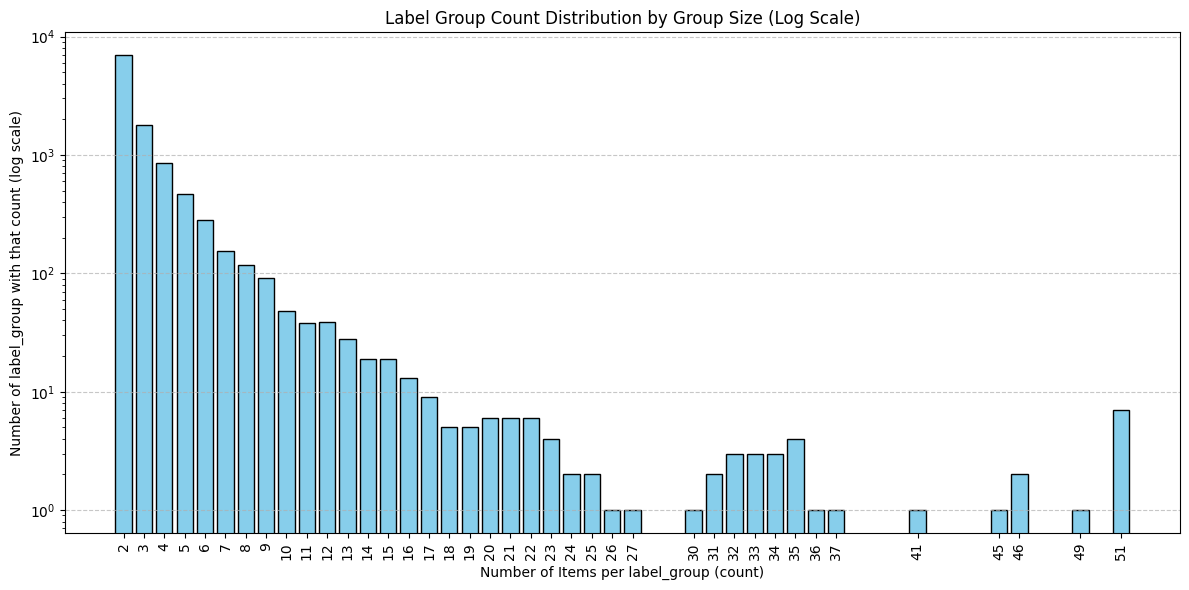

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(count_of_counts.index, count_of_counts.values, color='skyblue', edgecolor='black')

plt.title("Label Group Count Distribution by Group Size (Log Scale)")
plt.xlabel("Number of Items per label_group (count)")
plt.ylabel("Number of label_group with that count (log scale)")
plt.yscale("log")  # 🔥 로그 스케일 적용
plt.xticks(count_of_counts.index, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [12]:
OUTPUT_PATH2 = os.path.join(DATA_DIR, "count_of_label_counts.csv")

# CSV로 저장 (utf-8 인코딩)
count_of_counts.to_csv(OUTPUT_PATH2, encoding='utf-8')

print("✅ 'count_of_label_counts.csv' 파일로 저장 완료")

✅ 'count_of_label_counts.csv' 파일로 저장 완료
